# 层次聚类（Hierarchical Clustering）

## 1. 算法介绍

聚类（Clustering）是非监督学习（Unsupervised Learing）的一类重要的应用，旨在从数据中发现其隐藏的模式或结构，即数据探索的作用。传统的聚类分析算法可分为基于质心，分布，密度，连接等的算法，其中应用最多的kmean算法就是一种典型的基于质心的算法。但是kmeans算法需要提前指定k值，即类的数量，而不同的k值的聚类结果差异很大。层次聚类作为一种基于连接的算法，其优点在于用户无需提前指定类数，而且可以通过树状图解释聚类结果。

层次聚类的基本出发点在于：一个大类总可以分成多个小的子类，而子类又可以分成子类的子类，类似于生物学的系统树图。按照聚类方向，层次聚类可以分为**agglomerative**（自下而上）和**divisive**（自上而下）两种类型。在agglomerative方法中，每个样本开始都作为一个独立的类，每次合并最接近的两个类，直到最后只有一个类为止。而divisive则相反，开始时所有样本都属于一个大类，然后每次将其中一个大类分解成两个更小的子类，直到每个样本都成为一个子类。一般情况下，agglomerative方法的计算复杂度为$O(n^{2}\text{log}(n))$，而divisive的复杂度为$O(2^{n})$。本文仅介绍agglomerative的层次聚类方法。

![agglomerative-vs-divisive](img/1.png)

**Agglomerative clustering**算法主要分为以下X个步骤：

1. 对N个样本，初始化得到含有N个类的集合C，每个类有且仅有一个样本，即$c_{i} = \{x_{i}\}$
2. 找到最接近的两个类：$\text{min}D(c_{i}, c_{j})$
3. 合并上述两个最近的类$c_{i}, c_{j}$，得到新的大类$c_{i+j}$
4. 在集合C中移除已经合并的两个子类$c_{i}, c_{j}$
5. 重复2-5，直到C中仅有一个类

其中$x_{i}$为第$i$个样本，$c_{i}$为第i个类。

算法原理很简单，其中最重要的问题是如何定义接近，即需要一个距离的定义。 距离定义不同，聚类结果也不同。根据不同的距离，层次聚类可分为：

* single linkage (两个类中距离最近的两个样本间的距离)
* complete linkage （两个类中距离最远的两个样本间的距离）
* average linkage （两个类中所有样本的平均距离）

此外，还有Ward's linkage，V-linkage等其他方法。

## 2. 使用scipy进行层次聚类

In [2]:
# load library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 2.1 创建数据

In [48]:
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,2.942023,0.979959,5.253712
ID_1,9.997822,0.148558,2.715511
ID_2,7.556867,8.416887,3.703794
ID_3,0.365229,8.532186,0.464417
ID_4,6.880232,9.824493,1.221621


上述代码创建了5个三维数据点，范围为[0, 10]。

### 2.2 使用scipy聚类：

In [17]:
from scipy.cluster.hierarchy import linkage

In [59]:
row_clusters = linkage(df.values,
        method='complete',
        metric='euclidean')
row_clusters

array([[  2.        ,   4.        ,   2.9326388 ,   2.        ],
       [  0.        ,   1.        ,   7.5444017 ,   2.        ],
       [  3.        ,   5.        ,   7.88837863,   3.        ],
       [  6.        ,   7.        ,  12.96686157,   5.        ]])

聚类结果分为$(N-1) \times 4$的矩阵，每行代表第$i$次迭代的结果。前两列分别是第$i$次被合并的两类的index，生成的新类的index为$N+i$。第三列为被合并的这两类的距离，最后一列是合并得到的新类含有的样本数量。

用pandas的DataFrame可视化的结果如下：

In [60]:
pd.DataFrame(row_clusters,
            columns=['row label 1',
                     'row label 2',
                     'distance',
                     'no. of items in clust.'],
            index=['cluster %d' % (i+1) for i in 
                   range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,2.0,4.0,2.932639,2.0
cluster 2,0.0,1.0,7.544402,2.0
cluster 3,3.0,5.0,7.888379,3.0
cluster 4,6.0,7.0,12.966862,5.0


### 2.3 Dendrogram可视化聚类过程

In [61]:
from scipy.cluster.hierarchy import dendrogram

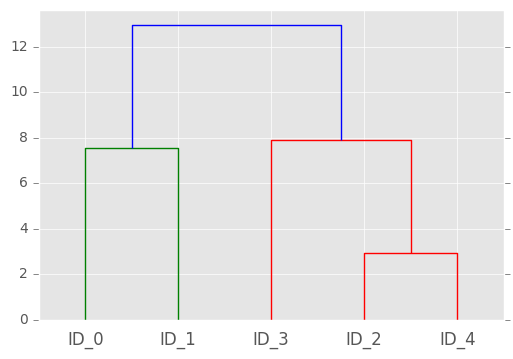

In [62]:
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       )

## 3. 参考资料

* [Python Machine Learning, Sebastian Raschka](https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/ref=sr_1_sc_1?ie=UTF8&qid=1494753213&sr=8-1-spell&keywords=python+machine+leanring)